# Exercise 4.9: List of Contents

## 1. Create Bar Chart
## 2. Create Histograms and Scatterplots
## 3. Create Line Charts/Sampling Data


In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import df

path = r'/Users/tristansavella/Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_task48.pkl'))

## 1. Create a bar chart

<Axes: xlabel='orders_day_of_week'>

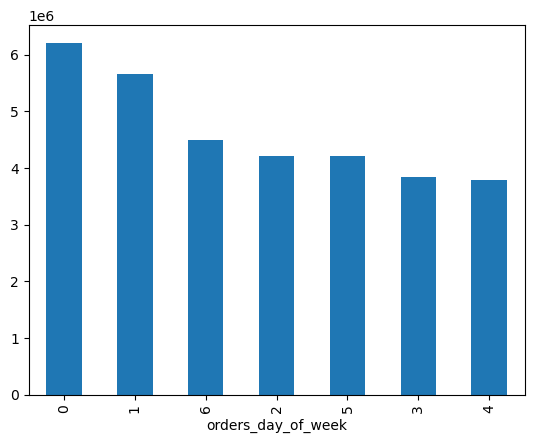

In [3]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

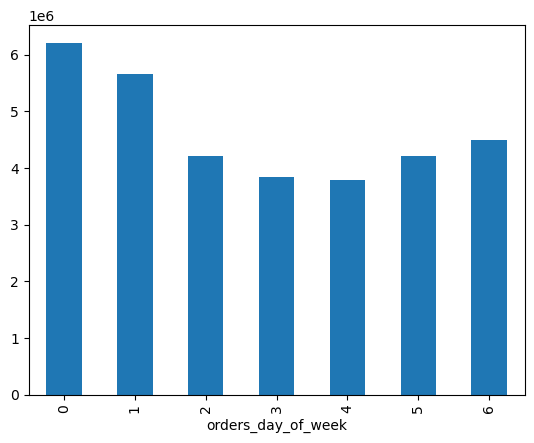

In [4]:
#Same bar chart sorted
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

#### Exporting Chart

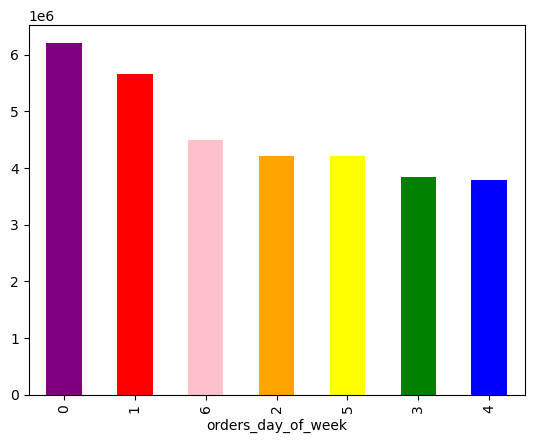

In [5]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
#Export into new folder
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

## 2. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

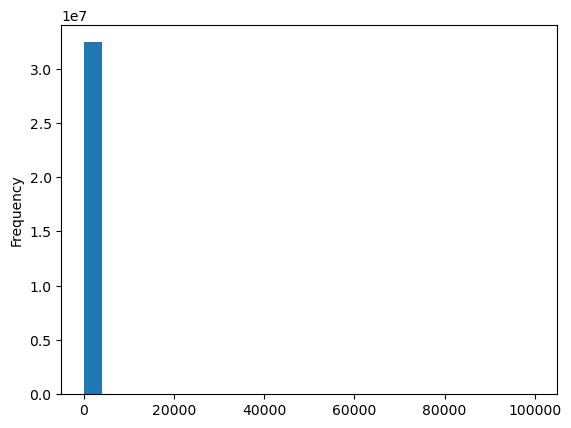

In [7]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
# data consistency check
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

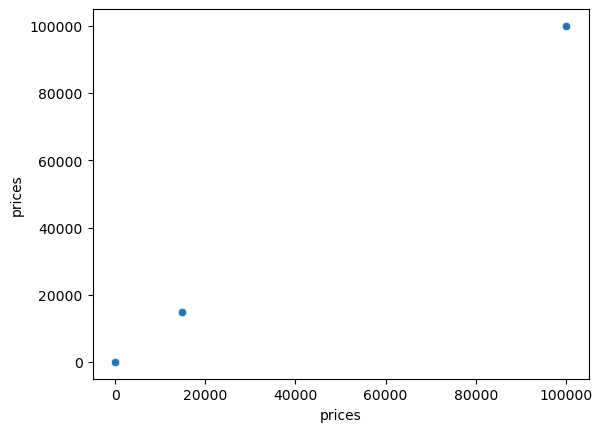

In [9]:
#scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
# Running check assuming most prices in grocery store are under 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_passed_since_last_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,Spending_Flag,Frequency_Flag,median_days_passed
10030345,171,912404,17,prior,12,2,14,5.0,21553,5,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,Frequent customer,5.0
10030346,181,603376,17,prior,22,6,16,4.0,21553,3,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,Frequent customer,5.0
10030347,1944,3264360,135,prior,2,2,21,13.0,21553,6,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,Regular customer,12.0
10030348,1945,892534,135,prior,3,0,8,12.0,21553,3,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,Regular customer,12.0
10030349,5708,229704,342,prior,8,1,19,30.0,21553,9,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,Non-Frequent customer,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,3386542,2249946,204099,prior,29,0,8,4.0,33664,1,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,Frequent customer,4.0
29193269,3386544,2363282,204099,prior,31,0,9,2.0,33664,1,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,Frequent customer,4.0
29193270,3391313,3181945,204395,prior,13,3,15,8.0,33664,25,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,Frequent customer,5.0
29193271,3405096,2486215,205227,prior,7,3,20,4.0,33664,8,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,Regular customer,12.0


In [11]:
#Marking these most likely false outliers as missing
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [12]:
#Checking again
ords_prods_merge['prices'].max()

25.0

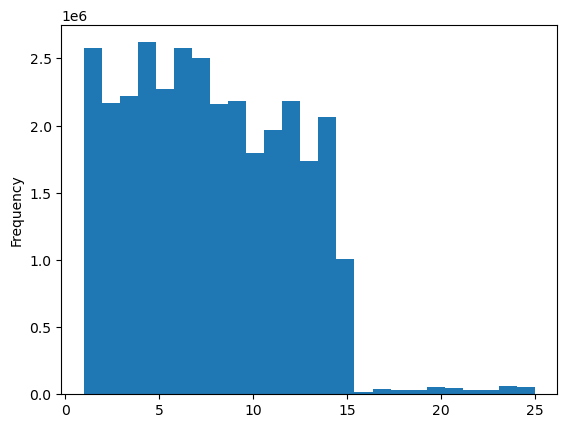

In [13]:
#histogram with cleaned data
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

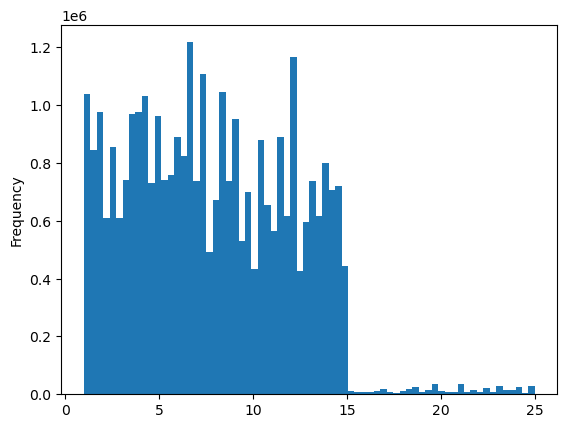

In [14]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
#Export 1st histogram
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_orders_prices.png'))

In [16]:
#Export 2nd histogram
hist_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_2_orders_prices.png'))

## 3. Create Line Charts/Sampling Data

In [17]:
#setting seed to 4 and creating a list holding true/false values

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [18]:
#splitting seed 4 into two samples: 70% of sample in dataframe big

big = ords_prods_merge[dev]

In [19]:
#splitting seed 4 into two samples: 30% of sample in dataframe small

small = ords_prods_merge[~dev]

In [20]:
dev

array([False,  True, False, ..., False,  True,  True])

In [21]:
len(ords_prods_merge)

32434212

In [22]:
len(big)

22704483

In [23]:
len(small)

9729729

In [24]:
len(big) + len(small)

32434212

In [25]:
#reducing samples to only those columns necessary for the chart
df_2 = small[['orders_day_of_week','prices']]

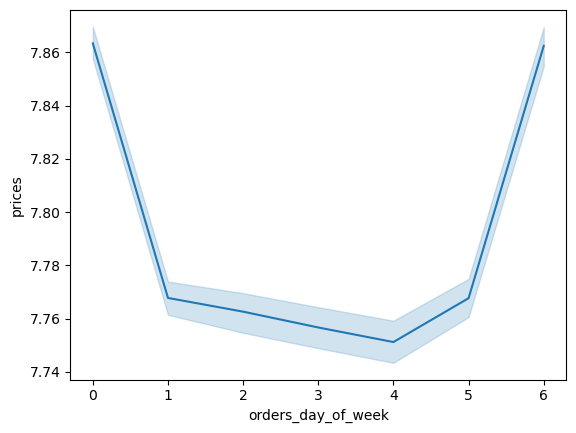

In [26]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [27]:
#Exporting line chart
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_dow_smallsample.png'))